# **1. Perkenalan Dataset**


## Deskripsi Dataset
Dataset ini berisi data historis pinjaman yang mencakup informasi pendapatan peminjam, usia, jumlah pinjaman, dan status kepemilikan rumah. Tujuannya adalah memprediksi status pinjaman.

**Tujuan Notebook:**
Notebook ini bertujuan untuk membaca data mentah, membersihkan missing values, memfilter data yang tidak masuk akal, dan menyamakan nama kolom agar siap digunakan oleh script `modelling.py`.

**Sumber Dataset:**
[https://www.kaggle.com/datasets/laotse/credit-risk-dataset]

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [6]:
%pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
file_path = '../credit_risk_raw/credit_risk_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil dimuat!")
    
    # Menampilkan 5 baris pertama
    display(df.head())
    
    # Menampilkan dimensi data (baris, kolom)
    print(f"\nDimensi Data: {df.shape}")
    
except FileNotFoundError:
    print(f"❌ File '{file_path}' tidak ditemukan. Pastikan file ada di folder yang sama.")

✅ Dataset berhasil dimuat!


,income,age,loan_amount,credit_history,approved
0,5745.071230,59,7852,2,1
1,4792.603548,30,3551,1,0
2,5971.532807,22,7411,2,1
3,7284.544785,25,1007,2,0
4,4648.769938,28,9087,1,0



Dimensi Data: (1000, 5)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- INFO DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          1000 non-null   float64
 1   age             1000 non-null   int64  
 2   loan_amount     1000 non-null   int64  
 3   credit_history  1000 non-null   int64  
 4   approved        1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB

--- STATISTIK DESKRIPTIF ---


,income,age,loan_amount,credit_history,approved
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,5028.998084,39.324000,5422.2640,1.013000,0.516000
std,1468.823907,11.449721,2540.0422,0.817006,0.499994
min,138.098990,20.000000,1006.0000,0.000000,0.000000
25%,4028.614542,29.000000,3220.7500,0.000000,0.000000
50%,5037.950918,40.000000,5317.0000,1.000000,1.000000
75%,5971.915813,49.000000,7588.2500,2.000000,1.000000
max,10779.097236,59.000000,9988.0000,2.000000,1.000000



--- MISSING VALUES ---
income            0
age               0
loan_amount       0
credit_history    0
approved          0
dtype: int64

Jumlah Data Duplikat: 0


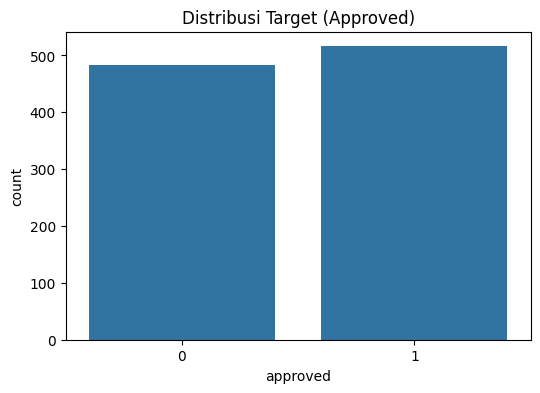

In [9]:
# 1. Cek Informasi Umum (Tipe data, Non-null count)
print("--- INFO DATASET ---")
df.info()

# 2. Cek Statistik Deskriptif
print("\n--- STATISTIK DESKRIPTIF ---")
display(df.describe())

# 3. Cek Missing Values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# 4. Cek Duplikasi Data
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# 5. Visualisasi Target (Contoh: Kolom 'loan_status' atau 'approved')
# Sesuaikan 'loan_status' dengan nama kolom target Anda
if 'loan_status' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='loan_status', data=df)
    plt.title('Distribusi Target (Loan Status)')
    plt.show()
elif 'approved' in df.columns: # Jika nama kolomnya approved
    plt.figure(figsize=(6, 4))
    sns.countplot(x='approved', data=df)
    plt.title('Distribusi Target (Approved)')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# 1. Menghapus Data Duplikat
jumlah_duplikat = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"✅ Berhasil menghapus {jumlah_duplikat} baris data duplikat.")

# 2. Handling Missing Values (Nilai Kosong)
# Memisahkan kolom angka dan tulisan
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Isi missing value Angka dengan MEDIAN
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Isi missing value Tulisan dengan MODUS
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Missing values berhasil diisi (Imputation).")

# 3. Encoding (Mengubah Huruf menjadi Angka)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Encoding selesai (Semua data kini berupa angka).")

# 4. Simpan Data Bersih
output_file = 'credit_risk_preprocessing.csv'
df.to_csv(output_file, index=False)

print(f"\n🎉 SUKSES! Data bersih telah disimpan sebagai: {output_file}")
print("Anda siap lanjut ke tahap Modelling/Training!")

# Tampilkan 5 baris data yang sudah bersih
display(df.head())

✅ Berhasil menghapus 0 baris data duplikat.
✅ Missing values berhasil diisi (Imputation).
✅ Encoding selesai (Semua data kini berupa angka).

🎉 SUKSES! Data bersih telah disimpan sebagai: credit_risk_preprocessing.csv
Anda siap lanjut ke tahap Modelling/Training!


,income,age,loan_amount,credit_history,approved
0,5745.071230,59,7852,2,1
1,4792.603548,30,3551,1,0
2,5971.532807,22,7411,2,1
3,7284.544785,25,1007,2,0
4,4648.769938,28,9087,1,0
